In [1]:
# Create empty raw_definitions, to hold definiendum, short definiendum (abbreviation of definiens), and definiens.
raw_definitions = []

In [2]:
# Needed if importing the terminology from a CSV file.
import csv

In [3]:
# Fill raw_definitions as a list of triples, where a triple includes the definiendum, short definiendum, and definiens.
with open('ilang_UN_GWHT_terminology_raw - Sheet1.csv') as raw_definitions_file:
    raw_definitions_csv = csv.reader(raw_definitions_file, delimiter = ',')
    for row in raw_definitions_csv:
        raw_definitions.append({'definiendum':row[0], 'short definiendum':row[1], 'definiens':row[2]})

In [4]:
# Show raw_definitions content and size.

In [5]:
print(raw_definitions)
len(raw_definitions)

[{'definiendum': 'Definiendum', 'short definiendum': 'Short Definiendum', 'definiens': 'Definiens'}, {'definiendum': 'Action Plan for the Future', 'short definiendum': 'Action Plan', 'definiens': 'The Action Plan for the Future (Cultural Landscapes)\n        was prepared by the UNESCO "Expert Meeting on\n        Cultural Landscapes of Outstanding Universal Value" held in\n        Templin, Germany in October 1993 (see von Droste et al\n        1995: Annex 1).  The Action Plan outlines\n        recommendations concerning the provision of "Guidance to\n        States Parties on the Identification, Assessment, Nomination\n        and Management of Cultural Landscapes for Inclusion in the\n        World Heritage List" and on the preparation of a "Thematic\n        Study on Cultural Landscapes".  The Action Plan was\n        adopted by the World Heritage Committee at its\n        seventeenth session in 1993 (UNESCO 4 February 1994:\n        55-56 and Annex VII).\n\nsee Cultural landscapes'},

160

In [6]:
# Define a function needed to ignore case, when searching for occurrences of definiendum and short definiendum in definiens.

In [7]:
import unicodedata
def normalize_caseless(text):
    return unicodedata.normalize("NFKD", text.casefold())

In [8]:
# Create an empry term dependencies network, to hold dependencies of definitions on terms.

In [9]:
term_dependency_network = []

In [10]:
# Make the term dependency network as follows, and fill it into term_dependency_network:
# If a definiendum or short definendum A appears in a definiens of B, then definiendum B depends on definiendum A.
for i in raw_definitions:
    for j in raw_definitions:
        if (normalize_caseless(i['definiendum']) in normalize_caseless(j['definiens'])) or (normalize_caseless(i['short definiendum']) in normalize_caseless(j['definiens'])):
            term_dependency_network.append({'definiendum':j['definiendum'], 'depends on':i['definiendum']})
            print(j['definiendum'], '--depends on->', i['definiendum'])

# Show term_dependency_network size.
len(term_dependency_network)

Action Plan for the Future --depends on-> Action Plan for the Future
Corrective measures --depends on-> Action Plan for the Future
Advisory bodies --depends on-> Advisory bodies
Reactive monitoring --depends on-> Advisory bodies
State of conservation --depends on-> Advisory bodies
Assistance --depends on-> Assistance
Balance --depends on-> Assistance
Convention concerning the protection of the world cultural
and natural heritage --depends on-> Assistance
Emergency assistance --depends on-> Assistance
International assistance --depends on-> Assistance
International protection --depends on-> Assistance
List of World Heritage in Danger --depends on-> Assistance
Operational Guidelines for the Implementation of the World
Heritage Convention
 --depends on-> Assistance
Preparatory assistance --depends on-> Assistance
Promotional activities --depends on-> Assistance
Technical co-operation --depends on-> Assistance
Training --depends on-> Assistance
World Heritage Committee --depends on-> Assis

Training --depends on-> Implementation
World Conservation Monitoring Centre --depends on-> Implementation
Immovable property --depends on-> Immovable property
Movable property --depends on-> Immovable property
Indicative list --depends on-> Indicative list
Inventory of property --depends on-> Indicative list
Authenticity --depends on-> Information sources
Information sources --depends on-> Information sources
Groups of urban buildings --depends on-> Inhabited historic towns
Inhabited historic towns --depends on-> Inhabited historic towns
Cultural heritage --depends on-> Inscription
Deferred --depends on-> Inscription
International Council of Monuments and
Sites --depends on-> Inscription
Inscription --depends on-> Inscription
Tentative list --depends on-> Inscription
Corrective measures --depends on-> Integrity
Criteria --depends on-> Integrity
Cultural heritage criteria --depends on-> Integrity
Evaluation --depends on-> Integrity
Integrity --depends on-> Integrity
IUCN - The World Con

Organization of World Heritage Cities --depends on-> OWHC
Precisely delineated [natural] areas --depends on-> Precisely delineated [natural] areas
International assistance --depends on-> Preparatory assistance
Preparatory assistance --depends on-> Preparatory assistance
World Heritage Fund --depends on-> Preparatory assistance
Conservation --depends on-> Presentation
Identification --depends on-> Presentation
Integrity --depends on-> Presentation
International assistance --depends on-> Presentation
National protection --depends on-> Presentation
Presentation --depends on-> Presentation
Protection --depends on-> Presentation
Rehabilitation --depends on-> Presentation
Transmission --depends on-> Presentation
Advisory bodies --depends on-> Preservation
Balance --depends on-> Preservation
Conservation --depends on-> Preservation
Justification --depends on-> Preservation
Preservation --depends on-> Preservation
Promotional activities --depends on-> Preservation
Protection --depends on-> Pre

 --depends on-> World Heritage Committee
Organically evolved landscape --depends on-> World Heritage Committee
Rules of Procedure --depends on-> World Heritage Committee
Secretariat --depends on-> World Heritage Committee
State of conservation --depends on-> World Heritage Committee
United Nations Educational, Scientific and Cultural
Organization --depends on-> World Heritage Committee
World Heritage Bureau --depends on-> World Heritage Committee
World Heritage Committee --depends on-> World Heritage Committee
Advisory bodies --depends on-> World Heritage Convention
Authenticity --depends on-> World Heritage Convention
Conservation --depends on-> World Heritage Convention
Identification --depends on-> World Heritage Convention
Integrity --depends on-> World Heritage Convention
Operational Guidelines for the Implementation of the World
Heritage Convention
 --depends on-> World Heritage Convention
Presentation --depends on-> World Heritage Convention
Preservation --depends on-> World Her

1428

In [11]:
print(term_dependency_network)

[{'definiendum': 'Action Plan for the Future', 'depends on': 'Action Plan for the Future'}, {'definiendum': 'Corrective measures', 'depends on': 'Action Plan for the Future'}, {'definiendum': 'Advisory bodies', 'depends on': 'Advisory bodies'}, {'definiendum': 'Reactive monitoring', 'depends on': 'Advisory bodies'}, {'definiendum': 'State of conservation', 'depends on': 'Advisory bodies'}, {'definiendum': 'Assistance', 'depends on': 'Assistance'}, {'definiendum': 'Balance', 'depends on': 'Assistance'}, {'definiendum': 'Convention concerning the protection of the world cultural\nand natural heritage', 'depends on': 'Assistance'}, {'definiendum': 'Emergency assistance', 'depends on': 'Assistance'}, {'definiendum': 'International assistance', 'depends on': 'Assistance'}, {'definiendum': 'International protection', 'depends on': 'Assistance'}, {'definiendum': 'List of World Heritage in Danger', 'depends on': 'Assistance'}, {'definiendum': 'Operational Guidelines for the Implementation of t

In [12]:
# Create an empty networkx graph to hold the term dependency network
import networkx as nx
tdn_graph = nx.DiGraph()

In [13]:
# Add to tdn_graph a directed edge for each term dependency in term_dependency_network.
for i in term_dependency_network:
    tdn_graph.add_edge(i['definiendum'], i['depends on'], label = 'depends')

In [14]:
# Show edges and nodes of tdn_graph.
print(tdn_graph.edges)
print(tdn_graph.nodes)

[('Action Plan for the Future', 'Action Plan for the Future'), ('Action Plan for the Future', 'Committee'), ('Action Plan for the Future', 'Cultural landscapes'), ('Action Plan for the Future', 'Identification'), ('Action Plan for the Future', 'List'), ('Action Plan for the Future', 'Management'), ('Action Plan for the Future', 'Nomination'), ('Action Plan for the Future', 'Outstanding universal value'), ('Action Plan for the Future', 'States Parties'), ('Action Plan for the Future', 'UNESCO'), ('Action Plan for the Future', 'World Heritage'), ('Action Plan for the Future', 'World Heritage Committee'), ('Action Plan for the Future', 'World Heritage List'), ('Corrective measures', 'Action Plan for the Future'), ('Corrective measures', 'Authenticity'), ('Corrective measures', 'Conditions of authenticity'), ('Corrective measures', 'Corrective measures'), ('Corrective measures', 'Criteria'), ('Corrective measures', 'Guidelines'), ('Corrective measures', 'Integrity'), ('Corrective measures'

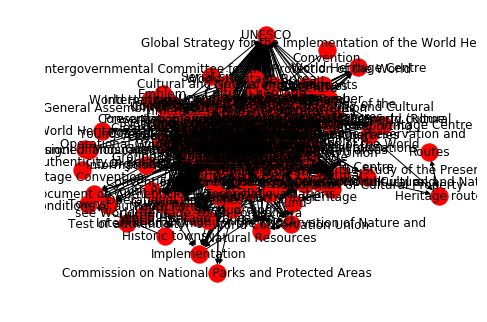

In [110]:
# Draw tdn_graph.
import matplotlib.pyplot as plt
pos = nx.spring_layout(tdn_graph,k=1,iterations=200)
nx.draw(tdn_graph, pos, arrows=True, with_labels=True)
plt.savefig("graph.pdf")

In [114]:
nx.write_edgelist(tdn_graph, "test_edgelist.txt", delimiter = '%')

In [50]:
len(tdn_graph.nodes)

158

In [51]:
len(tdn_graph.edges)

1428

In [53]:
in_degrees = tdn_graph.in_degree()
print(in_degrees)

[('Action Plan for the Future', 2), ('Corrective measures', 2), ('Advisory bodies', 3), ('Reactive monitoring', 5), ('State of conservation', 6), ('Assistance', 14), ('Balance', 1), ('Convention concerning the protection of the world cultural\nand natural heritage', 3), ('Emergency assistance', 4), ('International assistance', 9), ('International protection', 4), ('List of World Heritage in Danger', 8), ('Operational Guidelines for the Implementation of the World\nHeritage Convention\n', 0), ('Preparatory assistance', 3), ('Promotional activities', 3), ('Technical co-operation', 3), ('Training', 5), ('World Heritage Committee', 23), ('World Heritage Fund', 11), ('Associative cultural landscape', 3), ('Cultural landscapes', 10), ('Organically evolved landscape', 2), ('Authenticity', 15), ('Conditions of authenticity', 3), ('Conservation', 35), ('Criteria', 18), ('Cultural heritage criteria', 3), ('Cultural property', 7), ('Evaluation', 18), ('Global Strategy', 3), ('Information sources'

In [93]:
tdn_in_degrees = []

In [94]:
for i in in_degrees:
    tdn_in_degrees.append(i)

In [95]:
type(tdn_in_degrees)

list

In [99]:
type(tdn_in_degrees[1][0])

str

In [100]:
print(tdn_in_degrees)

[('Action Plan for the Future', 2), ('Corrective measures', 2), ('Advisory bodies', 3), ('Reactive monitoring', 5), ('State of conservation', 6), ('Assistance', 14), ('Balance', 1), ('Convention concerning the protection of the world cultural\nand natural heritage', 3), ('Emergency assistance', 4), ('International assistance', 9), ('International protection', 4), ('List of World Heritage in Danger', 8), ('Operational Guidelines for the Implementation of the World\nHeritage Convention\n', 0), ('Preparatory assistance', 3), ('Promotional activities', 3), ('Technical co-operation', 3), ('Training', 5), ('World Heritage Committee', 23), ('World Heritage Fund', 11), ('Associative cultural landscape', 3), ('Cultural landscapes', 10), ('Organically evolved landscape', 2), ('Authenticity', 15), ('Conditions of authenticity', 3), ('Conservation', 35), ('Criteria', 18), ('Cultural heritage criteria', 3), ('Cultural property', 7), ('Evaluation', 18), ('Global Strategy', 3), ('Information sources'

In [101]:
print(sorted(tdn_in_degrees))

[('Action Plan for the Future', 2), ('Advisory bodies', 3), ('Assistance', 14), ('Associative cultural landscape', 3), ('Authenticity', 15), ('Authorization form', 1), ('Balance', 1), ('Biogeographic(al) provinces', 0), ('Buffer zone', 1), ('Bureau', 16), ('CNPPA', 3), ('Canal', 2), ('Centre', 19), ('Clearly defined landscape', 4), ('Commission on National Parks and Protected Areas', 3), ('Committee', 45), ('Comparative assessments', 2), ('Comparative evaluations', 2), ('Conditions of authenticity', 3), ('Conservation', 35), ('Convention', 64), ('Convention concerning the protection of the world cultural\nand natural heritage', 3), ('Convention for the protection of the world cultural and\nnatural heritage', 0), ('Corrective measures', 2), ('Criteria', 18), ('Criterion', 1), ('Cultural heritage', 18), ('Cultural heritage criteria', 3), ('Cultural landscapes', 10), ('Cultural property', 7), ('Data sheets', 2), ('Deferral', 0), ('Deferred', 2), ('Deletion', 4), ('Delisting', 3), ('Design